In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df_final_demo = pd.read_csv("df_final_demo.txt")
df_exp_cli = pd.read_csv("df_final_experiment_clients.txt")
df_web_1 = pd.read_csv("df_final_web_data_pt_1.txt")
df_web_2 = pd.read_csv("df_final_web_data_pt_2.txt")

In [3]:
df_final_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [4]:
df_final_demo.shape

(70609, 9)

In [5]:
df_exp_cli.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [6]:
df_exp_cli.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [7]:
df_exp_cli.shape

(70609, 2)

In [8]:
df_web_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [9]:
df_web_2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [10]:
df_web = pd.concat([df_web_1, df_web_2], axis=0)
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [11]:
df_web['date_time'] = pd.to_datetime(df_web['date_time'], errors='coerce')

In [12]:
df = pd.merge(df_final_demo, df_exp_cli, on ='client_id',how='outer')
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN
1,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test
2,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test
3,722,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,NaN
4,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test


In [13]:
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN
1,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test
2,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test
3,722,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,NaN
4,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test


In [14]:
df.shape

(70609, 10)

In [15]:
df.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
Variation            object
dtype: object

In [16]:
df['clnt_tenure_yr'].unique()

array([21.,  3., 12., 11.,  9.,  5.,  8.,  7., 48., 14., 19., 23., 13.,
        4., 15.,  6., 16., 30., 27., 18., 20., 22., 17., 10., 24., 26.,
       25., 28., 29., 43., 32., 31., 34., 36., 55., 33., 35.,  2., 51.,
       37., 38., nan, 62., 40., 45., 39., 50., 52., 47., 44., 42., 41.,
       46., 54., 49.])

In [17]:
np.sort(df['clnt_tenure_yr'].unique())

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 54.,
       55., 62., nan])

In [18]:
df['clnt_tenure_yr'] = df['clnt_tenure_yr'].astype('Int64')

In [19]:
df['clnt_tenure_mnth'].unique()

array([262.,  46., 151., 143., 109., 145.,  66.,  99.,  85., 576., 177.,
        60., 150., 139., 229., 280., 260., 110., 157.,  98.,  63., 179.,
       231., 142.,  58., 117., 116., 189., 190.,  75.,  94., 172., 199.,
       154.,  86.,  77., 253., 361.,  57., 173.,  92., 329.,  72.,  81.,
       149., 155.,  89., 195., 141., 106., 252., 218., 364., 140., 241.,
       257., 226., 269., 170., 164.,  78., 108.,  56., 105.,  88., 211.,
       205.,  73., 194.,  69., 171., 126.,  71.,  83., 121., 299., 156.,
       285., 191., 321., 200.,  55.,  76., 242., 281., 294., 224., 166.,
        70., 304.,  65., 169., 264., 230., 222., 160., 192.,  74.,  84.,
        82., 168., 124., 119., 342., 219., 163., 144., 193., 131., 118.,
       158.,  87., 186., 107., 196.,  91., 277., 125., 122., 259., 178.,
       123., 310., 181., 232., 352., 214., 114., 250., 101.,  59., 345.,
       282.,  80., 129.,  68., 184., 174., 268., 246., 176., 183.,  95.,
        48., 255., 215., 100., 298., 187., 355., 31

In [20]:
df['clnt_tenure_mnth'] = df['clnt_tenure_mnth'].astype('Int64')

In [21]:
df['clnt_age'].unique()

array([47.5, 29.5, 57.5, 59.5, 51. , 36. , 48. , 22. , 54.5, 28.5, 42. ,
       46. , 45. , 58.5, 51.5, 55. , 43. , 62.5, 46.5, 37.5, 26.5, 63.5,
       56. , 25. , 52. , 63. , 30. , 70.5, 48.5, 38.5, 58. , 40. , 65.5,
       64.5, 50.5, 40.5, 29. , 76. , 25.5, 67. , 35.5, 53. , 61.5, 41.5,
       33. , 44. , 50. , 30.5, 55.5, 34. , 27. , 22.5, 38. , 36.5, 82. ,
       26. , 74. , 23. , 31.5, 60. , 53.5, 28. , 37. , 39. , 27.5, 77.5,
       52.5, 19.5, 62. , 34.5, 69. , 54. , 45.5, 65. , 21. , 20. , 60.5,
       74.5, 68. , 61. , 41. , 43.5, 75.5, 49.5, 32. , 67.5, 19. , 49. ,
       23.5, 33.5, 24. , 76.5, 71. , 59. , 15.5, 69.5, 56.5, 66. , 32.5,
       42.5, 57. , 47. , 81.5, 31. , 44.5, 71.5, 70. , 24.5, 75. , 77. ,
       81. , 14.5, 86.5, 73. , 39.5, 73.5, 79.5, 21.5, 85. , 35. , 80. ,
       72.5, 78. , 18.5, 64. , 68.5, 66.5, 84. , 72. , 20.5, 83. , 91. ,
       83.5, 16.5, 18. , 95.5, 82.5, 16. , 17. , 17.5, 80.5, 84.5, 78.5,
       92. , 79. , 89. ,  nan, 15. , 90. , 86. , 87

In [22]:
df['num_accts'].unique()

array([ 2.,  3.,  5.,  4.,  6.,  8., nan,  7.,  1.])

In [23]:
df['num_accts'] = df['num_accts'].astype('Int64')

In [24]:
df['calls_6_mnth'].unique()

array([ 4.,  2.,  0.,  1.,  6.,  5.,  3.,  7., nan])

In [25]:
df['calls_6_mnth'] = df['calls_6_mnth'].astype('Int64')

In [26]:
df['logons_6_mnth'].unique()

array([ 4.,  6.,  1.,  3.,  9.,  5.,  8.,  7.,  2., nan])

In [27]:
df['logons_6_mnth'] = df['logons_6_mnth'].astype('Int64')

In [28]:
df.columns = df.columns.str.lower()

In [29]:
df['gendr'].unique()

array(['M', 'U', 'F', nan, 'X'], dtype=object)

In [30]:
df.duplicated().sum()

0

In [31]:
df['gendr'] = df['gendr'].fillna('U')

In [32]:
df['variation'] = df['variation'].fillna('no_experiment')

In [33]:
df.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr                0
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
variation            0
dtype: int64

In [34]:
df['clnt_age'] = df['clnt_age'].fillna(df['clnt_age'].mean())

In [35]:
df.dropna(subset=['num_accts'], inplace=True)

### ¿Quienes son los principales clientes que utilizan este proceso en linea?

In [ ]:
# Primero queremos saber que cantidad de gente ha tomado el test.
frequency_table = df['variation'].value_counts()
frequency_table = frequency_table.loc[['Test', 'Control']]

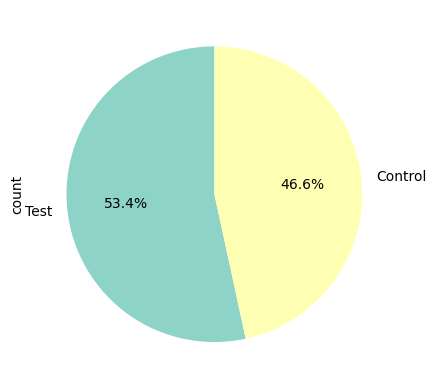

In [ ]:
frequency_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show()

C:\Users\rocio\AppData\Local\Temp\ipykernel_22036\1961423030.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")


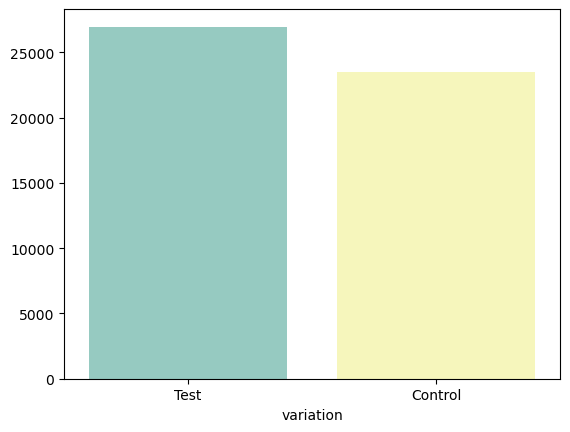

In [ ]:
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")
plt.show()

In [37]:
df.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation'],
      dtype='object')

In [38]:
df_filtrado = df[df['variation'] == 'Test']

In [43]:
df_filtrado.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,26961.0,4999638.515263,2877509.719102,555.0,2516570.0,5025928.0,7470213.0,9999832.0
clnt_tenure_yr,26961.0,11.982901,6.844947,2.0,6.0,11.0,15.0,55.0
clnt_tenure_mnth,26961.0,149.852899,81.78339,33.0,82.0,134.0,191.0,669.0
clnt_age,26961.0,47.163922,15.514461,17.0,33.5,47.5,59.5,96.0
num_accts,26961.0,2.249917,0.529335,1.0,2.0,2.0,2.0,7.0
bal,26961.0,148962.605032,307373.713775,23789.44,39729.2,65468.36,139478.58,16320040.15
calls_6_mnth,26961.0,3.061941,2.19059,0.0,1.0,3.0,5.0,6.0
logons_6_mnth,26961.0,6.101851,2.177119,3.0,4.0,6.0,8.0,9.0


In [ ]:
tf_total = df_filtrado['gendr',].value_counts()
tf_total

clnt_age
29.5    358
31.5    353
28.5    349
27.5    349
59.5    346
       ... 
17.0      1
96.0      1
95.5      1
93.0      1
94.5      1
Name: count, Length: 157, dtype: int64

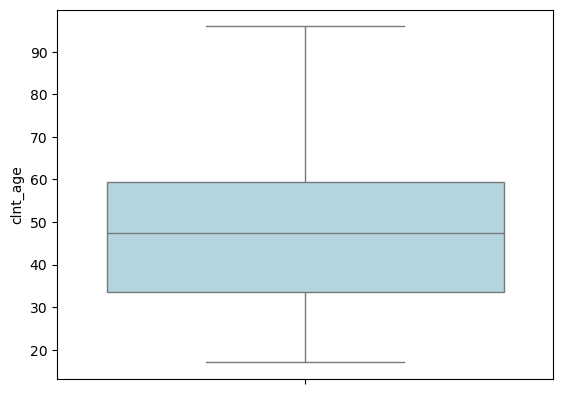

In [45]:
sns.boxplot(data = df_filtrado['clnt_age'], color="lightblue")
plt.show()

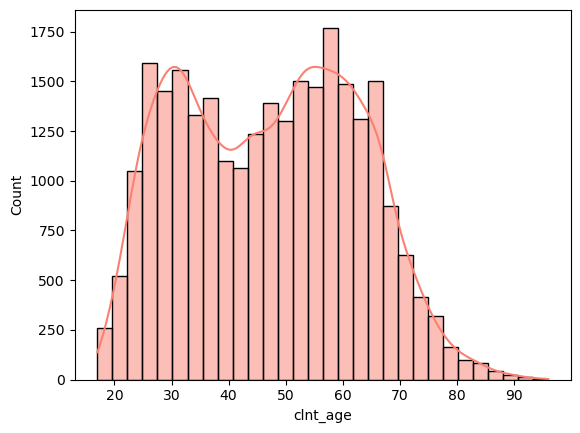

In [46]:
sns.histplot(df_filtrado['clnt_age'], kde=True, bins=30, color="salmon")
plt.show()

Dentro del perfil de los clientes que utilizan el proceso en linea vemos que la mayoria de gente se concentra entre 30 y 60 años. No existen outliers.

In [ ]:
# df.to_csv('df_final.csv', index=False)